In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
import re
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sqlalchemy import create_engine
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [4]:
pwd

'/Users/morvaridesam/Desktop/capstone'

In [5]:
df = pd.read_csv('./Data/top200-new.csv')

In [6]:
df.head()

,Position,Track Name,Artist,Streams,date,region,spotify_id
0,1.0,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,1867789.0,2019-01-01,us,3KkXRkHbMCARz0aVfEt68P
1,2.0,Wow.,Post Malone,1564946.0,2019-01-01,us,6MWtB6iiXyIwun0YzU6DFP
2,3.0,SICKO MODE,Travis Scott,1454622.0,2019-01-01,us,2xLMifQCjDGFmkHkpNLD9h
3,4.0,"thank u, next",Ariana Grande,1397512.0,2019-01-01,us,2rPE9A1vEgShuZxxzR2tZH
4,5.0,Going Bad (feat. Drake),Meek Mill,1245437.0,2019-01-01,us,2IRZnDFmlqMuOrYOLnZZyc


In [7]:
df.region.value_counts()

fr            73000
br            73000
ca            73000
nl            73000
se            73000
us            73000
de            73000
gb            73000
au            73000
mx            72800
2019-04-13      200
Name: region, dtype: int64

In [8]:
multi_index_df = pd.MultiIndex.from_frame(df)

In [9]:
df[multi_index_df]

KeyError: "None of [MultiIndex([(  1.0, 'Sunflower - Spider-Man: Into the Spider-Verse', ...),\n            (  2.0,                                          'Wow.', ...),\n            (  3.0,                                    'SICKO MODE', ...),\n            (  4.0,                                 'thank u, next', ...),\n            (  5.0,                       'Going Bad (feat. Drake)', ...),\n            (  6.0,                                      'Mo Bamba', ...),\n            (  7.0,              'Drip Too Hard (Lil Baby & Gunna)', ...),\n            (  8.0,            'ZEZE (feat. Travis Scott & Offset)', ...),\n            (  9.0,                                    'Without Me', ...),\n            ( 10.0,                                'Leave Me Alone', ...),\n            ...\n            (191.0,                                 'Cheap Thrills', ...),\n            (192.0,                                          'Fusk', ...),\n            (193.0,                     'Promises (with Sam Smith)', ...),\n            (194.0,                                     'September', ...),\n            (195.0,                       'The Rhythm of the Night', ...),\n            (196.0,                 'Hold On (feat. Michel Zitron)', ...),\n            (197.0,                               'När jag var han', ...),\n            (198.0,                                    'Safe Place', ...),\n            (199.0,                           'Tror jag hittar hem', ...),\n            (200.0,                                    'Costa Rica', ...)],\n           names=['Position', 'Track Name', 'Artist', 'Streams', 'date', 'region', 'spotify_id'], length=730000)] are in the [columns]"

In [ ]:
df.dtypes

In [ ]:
df.isnull().sum()

In [10]:
df.dropna(axis = 0, inplace = True)

In [11]:
df.isnull().sum()

Position      0
Track Name    0
Artist        0
Streams       0
date          0
region        0
spotify_id    0
dtype: int64

In [12]:
df['region'].value_counts()

fr    73000
br    73000
ca    73000
nl    73000
se    73000
us    73000
gb    73000
de    72999
au    72999
mx    72759
Name: region, dtype: int64

In [13]:
df.shape

(729757, 7)

In [11]:
df['region'] = df['region'].replace('au', 'Australia')
df['region'] = df['region'].replace('br', 'Brazil')
df['region'] = df['region'].replace('ca', 'Canada')
df['region'] = df['region'].replace('us', 'USA')
df['region'] = df['region'].replace('de', 'Germany')
df['region'] = df['region'].replace('fr', 'France')
df['region'] = df['region'].replace('mx', 'Mexico')
df['region'] = df['region'].replace('nl', 'Netherlands')
df['region'] = df['region'].replace('se', 'Sweden')
df['region'] = df['region'].replace('gb', 'UK')


In [ ]:
#to make it work use lambda function
#df['region'] = df['region'].map({'au': 'Australia', 'br': 'Brazil', 
                                 #'ca':'Canada', 'us': 'USA', 
    #'gr': 'Germany', 'de': "Germany", 'fr': 'France', 
     #           'se': 'Sweden', 'mx': 'Mexico', 'nl': 'Netherlands'})

In [12]:
def region_filter(region):
    return df[df['region'] == region]

In [41]:
germany_df = region_filter('Germany')

In [43]:
germany_df.pivot(index='date', columns='Position', values='Streams')

Position,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,191.0,192.0,193.0,194.0,195.0,196.0,197.0,198.0,199.0,200.0
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,439742.0,373845.0,353209.0,285326.0,247009.0,240526.0,238731.0,215591.0,205476.0,181041.0,...,39048.0,38983.0,38787.0,38744.0,38665.0,38513.0,38399.0,38374.0,38363.0,38178.0
2019-01-02,571275.0,488183.0,424648.0,366452.0,320501.0,309449.0,274834.0,260508.0,240324.0,220091.0,...,42209.0,42192.0,42097.0,41992.0,41965.0,41658.0,41301.0,40939.0,40598.0,40595.0
2019-01-03,556746.0,454237.0,420376.0,361066.0,311336.0,309767.0,273460.0,260452.0,240350.0,216102.0,...,42497.0,41968.0,41919.0,41899.0,41760.0,41204.0,41010.0,40692.0,40660.0,40576.0
2019-01-04,580879.0,477659.0,444815.0,383242.0,326291.0,323079.0,302538.0,296674.0,275496.0,254480.0,...,46409.0,46360.0,46002.0,45902.0,45693.0,45420.0,45361.0,45212.0,44990.0,44824.0
2019-01-05,543234.0,451848.0,430407.0,366424.0,318067.0,309575.0,303608.0,272966.0,259082.0,242696.0,...,46149.0,45761.0,45759.0,45735.0,45730.0,45710.0,45576.0,45548.0,45178.0,44551.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,646855.0,599246.0,485019.0,433087.0,365929.0,360589.0,347728.0,346384.0,344211.0,343705.0,...,62886.0,62746.0,62514.0,62337.0,61728.0,61269.0,60907.0,60598.0,60249.0,60238.0
2019-12-28,648955.0,514501.0,506313.0,416661.0,369509.0,368787.0,347057.0,346031.0,345905.0,322338.0,...,61762.0,61396.0,61391.0,61095.0,60843.0,60268.0,59993.0,59888.0,59485.0,59188.0
2019-12-29,548825.0,438473.0,404812.0,355110.0,346519.0,319097.0,298610.0,296869.0,292788.0,283014.0,...,53928.0,53572.0,52957.0,52906.0,52799.0,52788.0,52674.0,52665.0,52278.0,51501.0


In [ ]:
avg_stream = df.groupby('region')['Streams'].mean()

In [ ]:
ax = avg_stream.plot(kind = 'bar', figsize=(8, 3), 
                     color='darkturquoise', zorder=2, 
                        width=0.85)
plt.title("Average Streams by Top 10 Markets",fontweight="bold");



In [ ]:
rank1_mask = df[df['Position']== 1]

In [ ]:
top_artists = rank1_mask['Artist'].value_counts(ascending = False).head(10)

In [ ]:
top_tracks = rank1_mask['Track Name'].value_counts(ascending = False).head(10)

In [ ]:
ax = top_artists.plot(kind = 'barh', figsize=(8, 5), 
                     color='darkturquoise', zorder=2, 
                        width=0.85)
plt.title("Top Artists 2019", fontweight = 'bold')
ax.invert_yaxis();

In [ ]:
ax = top_tracks.plot(kind = 'barh', figsize=(8, 5), 
                     color='darkturquoise', zorder=2, 
                        width=0.85)
plt.title("Top Tracks 2019", fontweight = 'bold')
ax.invert_yaxis();

In [ ]:
top_singers_byreg = df[df['Position']==1].groupby('region')['Artist'].value_counts()

In [ ]:
top_singers_byreg

In [ ]:
df[df['Position']==1]['Streams'].groupby(df['Artist']).sum().sort_values(ascending = False)

In [ ]:
# how can I make counts based on # of Streams?

df[df['Position']==1]['Artist'].value_counts()

In [ ]:
top_singers_byreg

In [ ]:
top_songs_byreg = df[df['Position']==1].groupby('region')['Track Name'].value_counts()

In [ ]:
top_songs_byreg 

In [ ]:
df.dtypes

In [ ]:
#df = pd.get_dummies(df, columns = ['region','Artist'],drop_first=True)

In [ ]:
df.shape

In [28]:
pd.to_datetime(df.date).value_counts()

2019-08-18    2000
2019-06-27    2000
2019-01-16    2000
2019-02-18    2000
2019-08-26    2000
              ... 
2019-03-05    1995
2019-03-02    1995
2019-03-04    1995
2019-03-03    1995
2019-04-13    1800
Name: date, Length: 365, dtype: int64

In [33]:
pd.MultiIndex(df, levels=[df[['region', 'Position']])

SyntaxError: invalid syntax (<ipython-input-33-a794b0ee85ca>, line 1)

In [ ]:
# Change date column to be datetime dtype
df.set_index(pd.to_datetime(df['date']), inplace = True)

In [ ]:
df.drop(columns =['date'], inplace = True)

In [ ]:
df[df['Track Name'] == 'Wow.']

In [48]:
def plot_series(df, cols=None, title='Title', xlab=None, ylab=None, steps=1):
    
    
    plt.figure(figsize=(18,9))
    for col in cols:
        plt.plot(df[col])
    
    plt.title(title, fontsize=26)
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    plt.yticks(fontsize=18)
    plt.xticks(df.index[0::steps], fontsize=18);

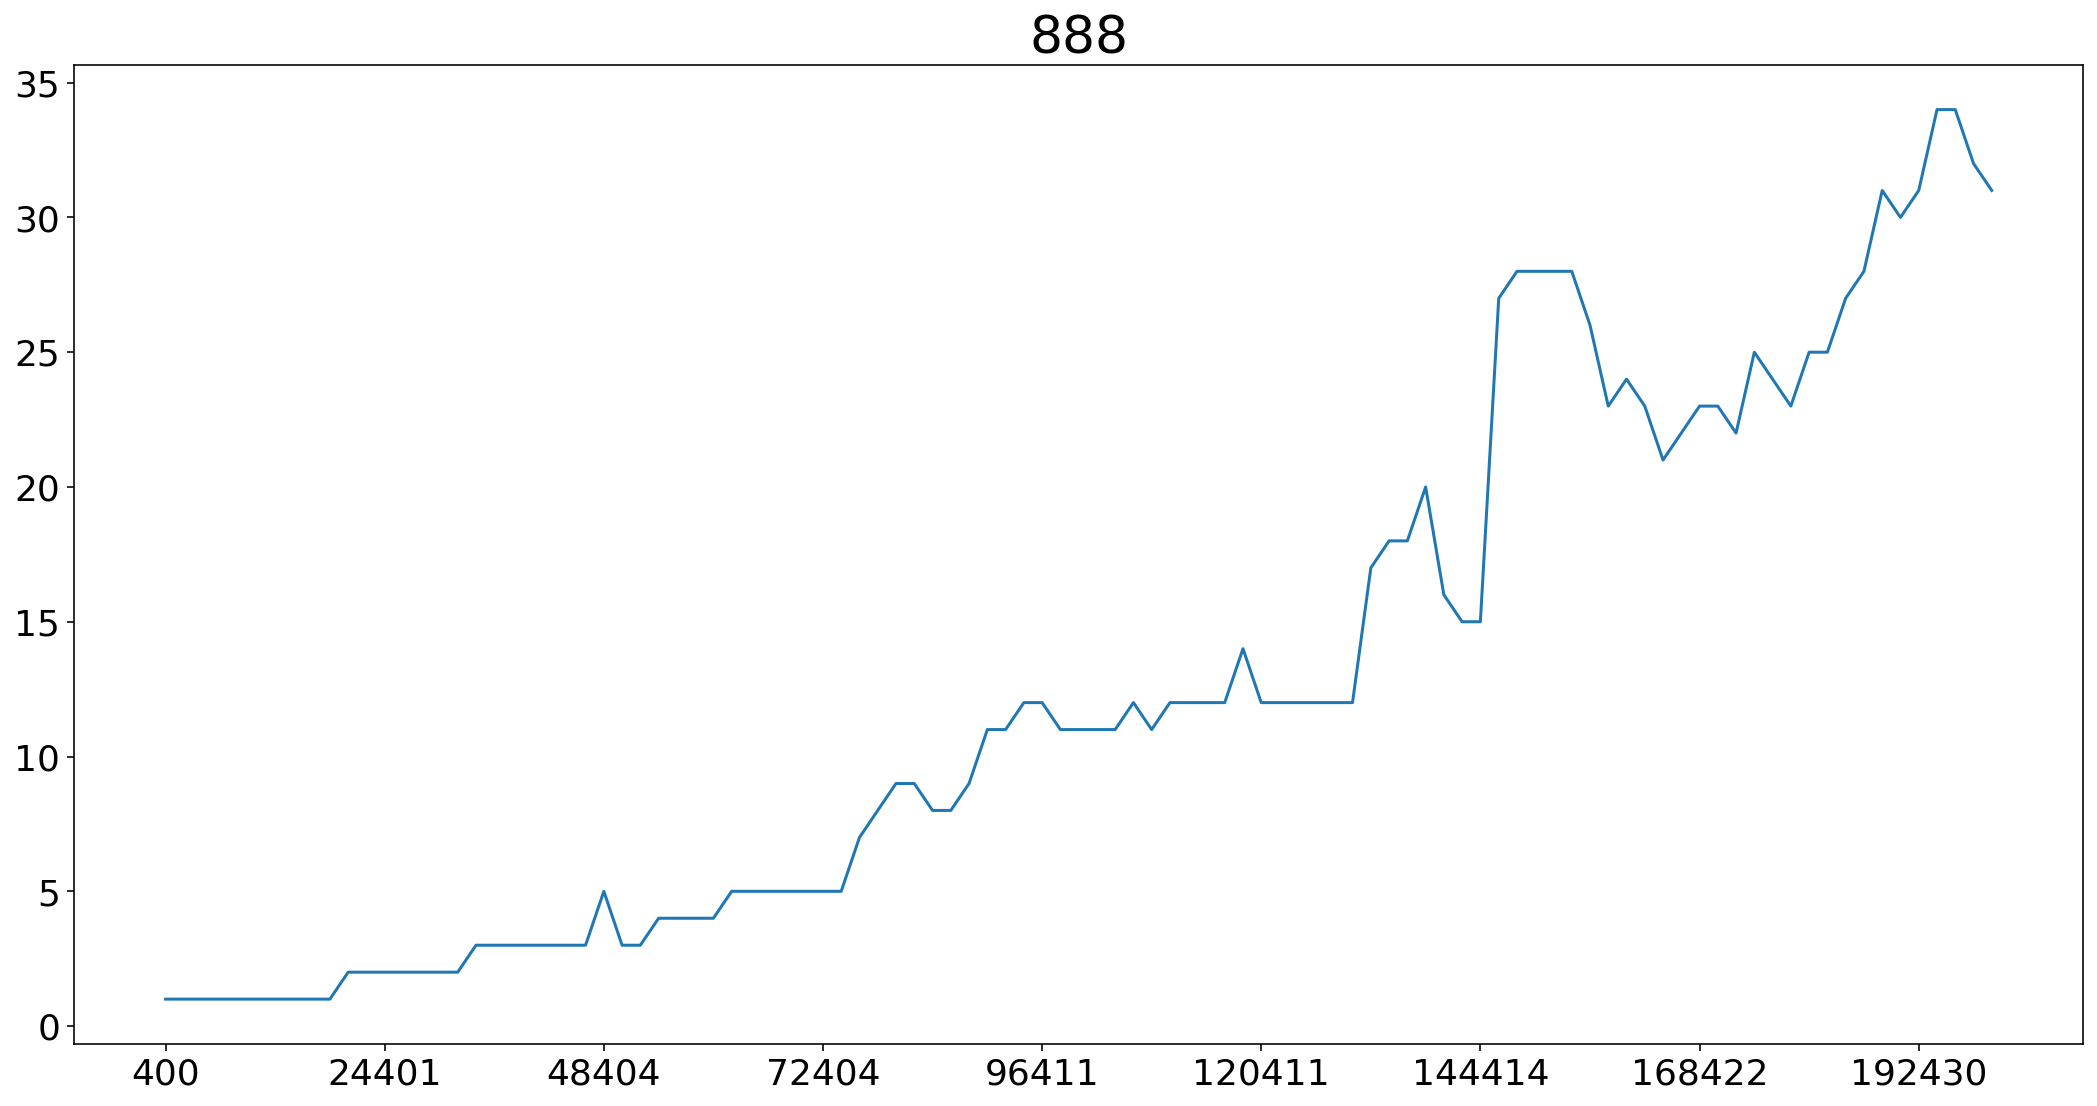

In [53]:
plot_series(df['spotify_id'] == '7KPGeiXWDsGEvFK62wzU8E'], cols=['Position'], title = '888', steps = 12)
inves

In [ ]:
df.sort_index(inplace = True)

In [ ]:
df['Streams'].resample('MS', closed = 'right').mean().plot()

In [ ]:
plot_series(df.resample('MS', closed = 'right').mean(),
            ['Streams'],
            title = 'Monthly Average Streams',
            steps = 12)

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(df['Streams']);

In [ ]:
df.head()

In [ ]:
df['Streams'].groupby(df['Artist'])

In [ ]:
region_filter('Australia')

In [ ]:
df['Position'].head()

In [ ]:
for i in df['Position']:
    

In [ ]:
def position_change(col, i, region):
    for i in df['Position']:
        if i == i:
            return df['Streams']
        else: 
            return df['Streams'].diff(1) 
                    

In [ ]:
fig, axes = plt.subplots(nrows=3, figsize=(15,12))
axes[0].plot(df['Streams']) # actual trend 
axes[1].plot(df['Streams'].diff(1)) # 
axes[2].plot(df['Streams'].pct_change())

In [ ]:
df['avg_streams'] = df['avg_stream'].diff(1)
df['first_diff_Streams'] = df['avg_stream'].diff(1)
df['second_diff_temp'] = df['avg_temp'].diff(1).diff(1)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

### MODEL

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(air.drop(columns='Streams'),
                                                    air['Streams'],
                                                    test_size = 0.2, shuffle = False) # shuffle param VERY IMPORTANT!

In [ ]:
y_train.value_counts(normalize = True)